In [ ]:
!pip install random-survival-forest
!pip install numpy scipy pandas scikit-learn cython cvxopt
!pip install scikit-survival
!pip install catboost

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

This dataset is for ABC Multistate bank with following columns:

customer_id, unused variable.

credit_score, used as input.

country, used as input.

gender, used as input.

age, used as input.

tenure, used as input.

balance, used as input.

products_number, used as input.

credit_card, used as input.

active_member, used as input.

estimated_salary, used as input.

churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data

In [5]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 12)

In [8]:
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [9]:
df['customer_id'] = df['customer_id'].astype('object')

In [10]:
dfstat1 = pd.DataFrame({'features': list(df)})
dfstat1['Unique'] = list(df.nunique())
dfstat1['%Unique'] = (list(df.nunique()/10000*100))
dfstat1['Zeros'] = list((df == 0).sum())
dfstat1['%Zeros'] = list((df == 0).sum()/10000*100)
dfstat1['Empty'] = list(df.isnull().sum())
dfstat1['%Empty'] = list(df.isnull().sum()/10000*100)

dfstat1

,features,Unique,%Unique,Zeros,%Zeros,Empty,%Empty
0,customer_id,10000,100.00,0,0.00,0,0.0
1,credit_score,460,4.60,0,0.00,0,0.0
2,country,3,0.03,0,0.00,0,0.0
3,gender,2,0.02,0,0.00,0,0.0
4,age,70,0.70,0,0.00,0,0.0
5,tenure,11,0.11,413,4.13,0,0.0
6,balance,6382,63.82,3617,36.17,0,0.0
7,products_number,4,0.04,0,0.00,0,0.0
8,credit_card,2,0.02,2945,29.45,0,0.0
9,active_member,2,0.02,4849,48.49,0,0.0


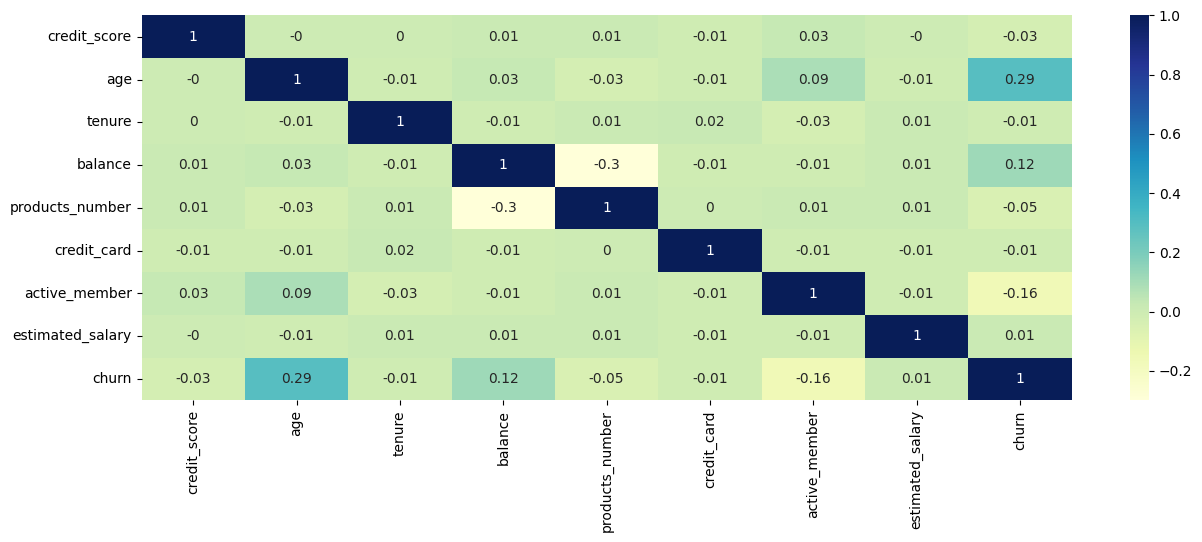

In [11]:
cor = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(round(cor,2), cmap="YlGnBu", annot=True);

In [12]:
dfstat2 = df.copy()
dfstat2 = dfstat2.describe().transpose()
dfstat2['Median'] = list(df.median(numeric_only=True))
dfstat2

,count,mean,std,min,25%,50%,75%,max,Median
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00,652.000
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00,37.000
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00,5.000
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09,97198.540
products_number,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00,1.000
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00,1.000
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00,1.000
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48,100193.915
churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00,0.000


array([[<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'products_number'}>,
        <Axes: title={'center': 'credit_card'}>],
       [<Axes: title={'center': 'active_member'}>,
        <Axes: title={'center': 'estimated_salary'}>,
        <Axes: title={'center': 'churn'}>]], dtype=object)

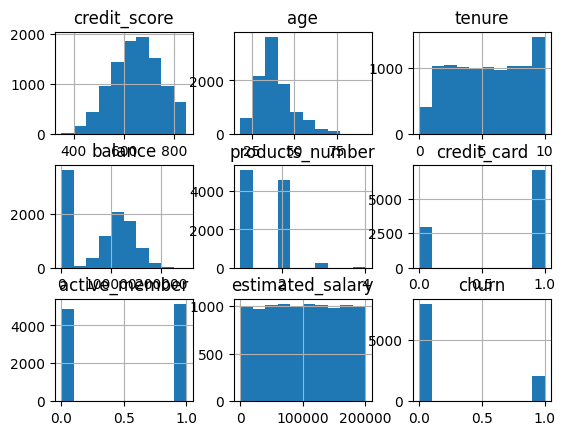

In [13]:
df.hist()

<Axes: >

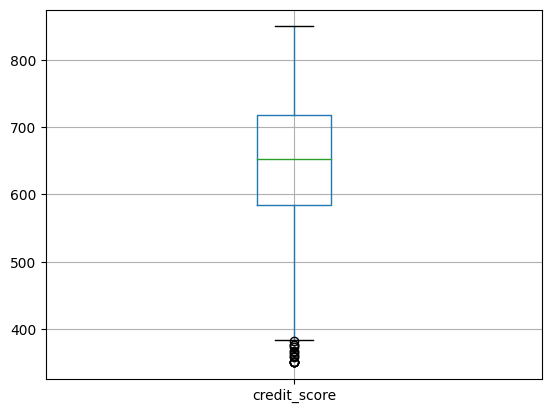

In [14]:
df.boxplot('credit_score')

<Axes: >

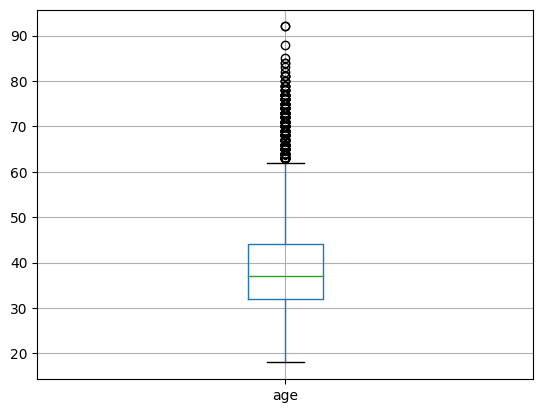

In [15]:
df.boxplot('age')

In [16]:
df = df.drop(columns = 'customer_id')

In [17]:
dfsupernew = pd.get_dummies (df)

<Axes: xlabel='churn'>

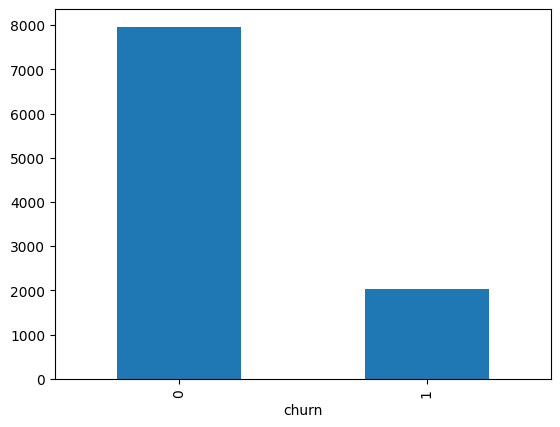

In [18]:
df['churn'].value_counts().plot(kind='bar')

In [19]:
dfsupernew.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [20]:
dfsupernew.dtypes

credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_France         bool
country_Germany        bool
country_Spain          bool
gender_Female          bool
gender_Male            bool
dtype: object

In [21]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc = sc.fit_transform(dfsupernew)
sc_df  = pd.DataFrame(sc, columns = dfsupernew.columns)
sc_df.shape

(10000, 14)

In [22]:
sc_df.dtypes

credit_score        float64
age                 float64
tenure              float64
balance             float64
products_number     float64
credit_card         float64
active_member       float64
estimated_salary    float64
churn               float64
country_France      float64
country_Germany     float64
country_Spain       float64
gender_Female       float64
gender_Male         float64
dtype: object

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(sc_df)
finaldf = pca.transform(sc_df)

finaldf.shape

(10000, 11)

# K-means Clustering, Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), Gaussian Mixture Models.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.preprocessing import StandardScaler

##K-means

Elbow Method or Silhouette Score

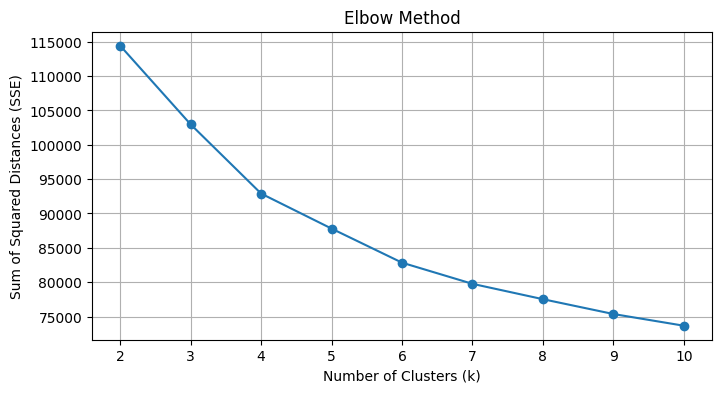

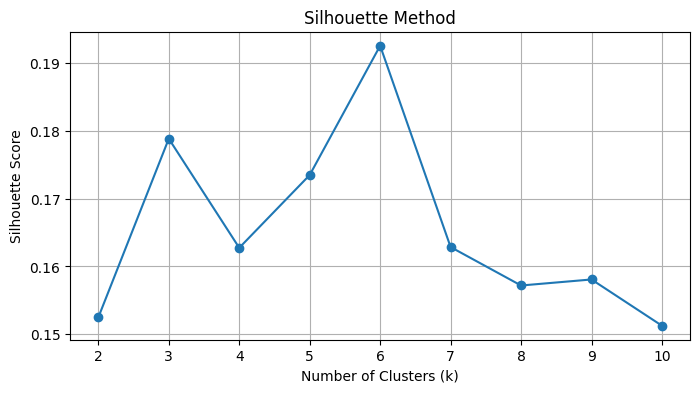

In [47]:
k_values = range(2, 11)


sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(finaldf)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()


silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(finaldf)
    silhouette_scores.append(silhouette_score(finaldf, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

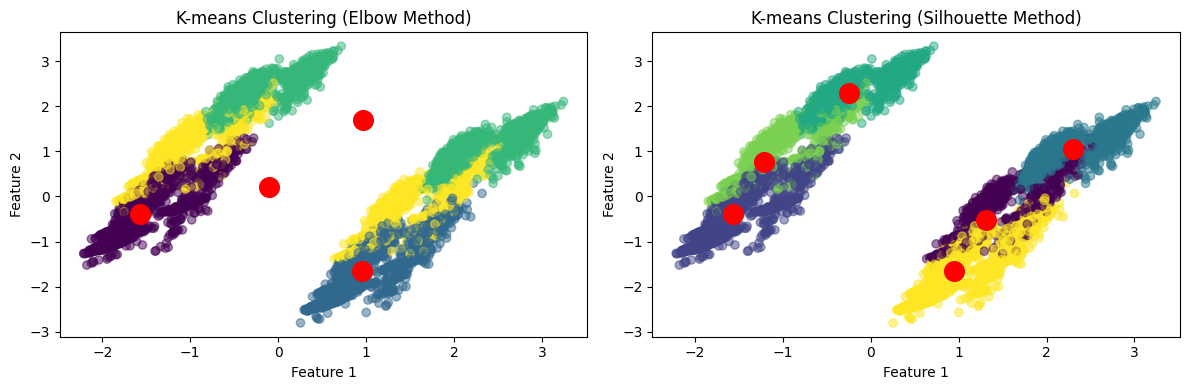

In [48]:

optimal_k_elbow = 4
optimal_k_silhouette = 6

kmeans_elbow = KMeans(n_clusters=optimal_k_elbow)
kmeans_elbow.fit(finaldf)

kmeans_silhouette = KMeans(n_clusters=optimal_k_silhouette)
kmeans_silhouette.fit(finaldf)


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.scatter(finaldf[:, 0], finaldf[:, 1], c=kmeans_elbow.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_elbow.cluster_centers_[:, 0], kmeans_elbow.cluster_centers_[:, 1], marker='o', s=200, color='red')
plt.title('K-means Clustering (Elbow Method)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.subplot(1, 2, 2)
plt.scatter(finaldf[:, 0], finaldf[:, 1], c=kmeans_silhouette.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans_silhouette.cluster_centers_[:, 0], kmeans_silhouette.cluster_centers_[:, 1], marker='o', s=200, color='red')
plt.title('K-means Clustering (Silhouette Method)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


In [ ]:

import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(optimal_k_elbow), colors):
    class_members = kmeans_elbow.labels_ == k
    cluster_center = kmeans_elbow.cluster_centers_[k]
    plt.plot(finaldf[class_members, 0], finaldf[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in finaldf[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % optimal_k_elbow)
plt.show()

plt.close('all')
plt.figure(2)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(optimal_k_silhouette), colors):
    class_members = kmeans_silhouette.labels_ == k
    cluster_center = kmeans_silhouette.cluster_centers_[k]
    plt.plot(finaldf[class_members, 0], finaldf[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in finaldf[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % optimal_k_silhouette)
plt.show()


##Hierarchical Clustering

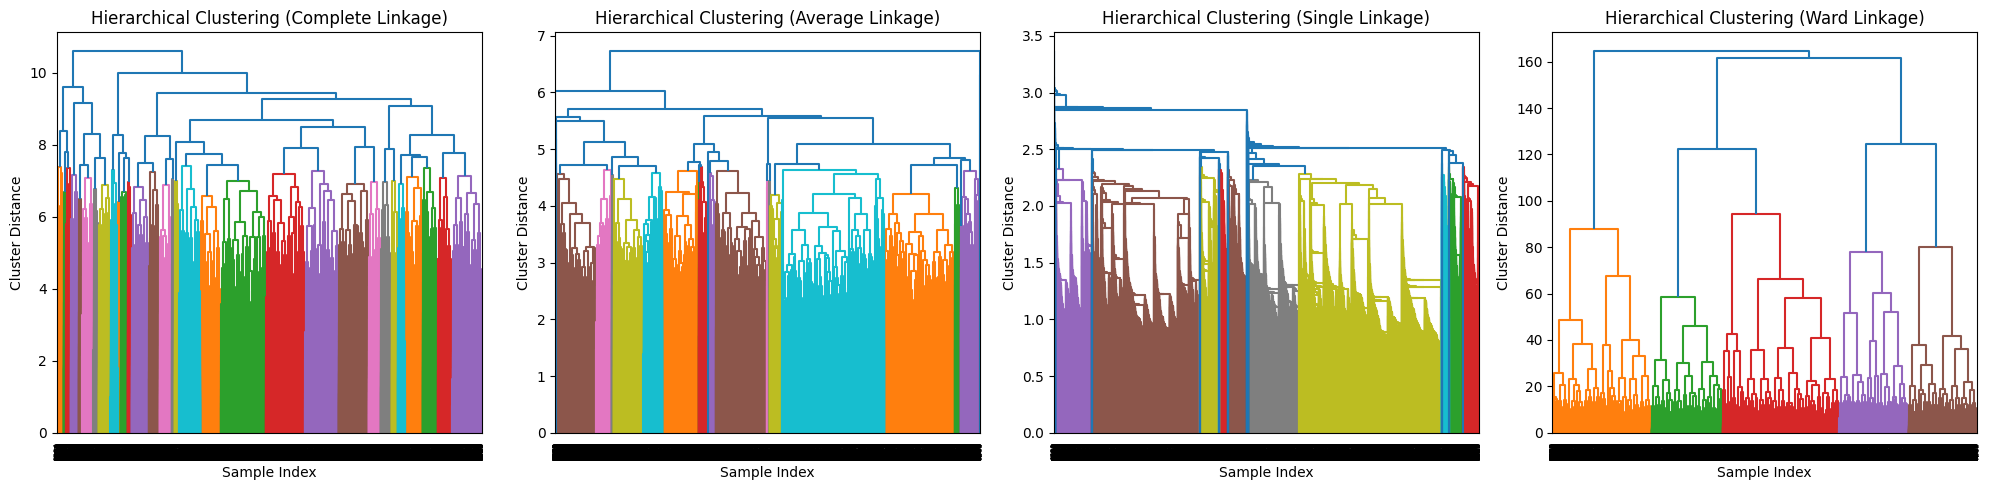

In [139]:


x = finaldf

linked_complete = linkage(x, method='complete')
linked_average = linkage(x, method='average')
linked_single = linkage(x, method='single')
linked_ward =  linkage(x, method='ward')

plt.figure(figsize=(20, 5))


plt.subplot(1, 4, 1)
sch.dendrogram(linked_complete)
plt.title('Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')


plt.subplot(1, 4, 2)
sch.dendrogram(linked_average)
plt.title('Hierarchical Clustering (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')


plt.subplot(1, 4, 3)
sch.dendrogram(linked_single)
plt.title('Hierarchical Clustering (Single Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')


plt.subplot(1, 4, 4)
sch.dendrogram(linked_ward)
plt.title('Hierarchical Clustering (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')


plt.tight_layout()
plt.show()


##DBSCAN

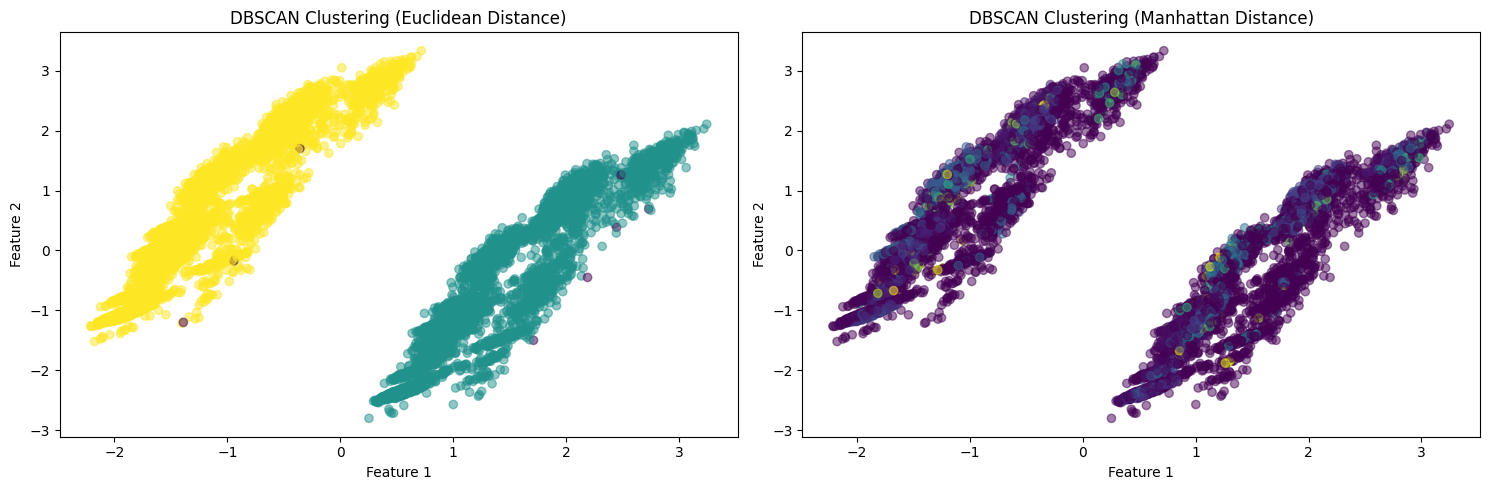

In [274]:

nn = NearestNeighbors(n_neighbors=5)
nn.fit(finaldf)
distances, _ = nn.kneighbors()
eps = np.sort(distances[:, -1])[int(0.99 * len(distances))]


dbscan_euclidean = DBSCAN(eps=eps, min_samples=5, metric='euclidean', n_jobs=-1)
labels_euclidean_dbscan = dbscan_euclidean.fit_predict(finaldf)


dbscan_manhattan = DBSCAN(eps=eps, min_samples=5, metric='manhattan', n_jobs=-1)
labels_manhattan_dbscan = dbscan_manhattan.fit_predict(finaldf)


plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(finaldf[:, 0], finaldf[:, 1], c=labels_euclidean_dbscan, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering (Euclidean Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(finaldf[:, 0], finaldf[:, 1], c=labels_manhattan_dbscan, cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering (Manhattan Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.tight_layout()
plt.show()

##Gaussian Mixture Model

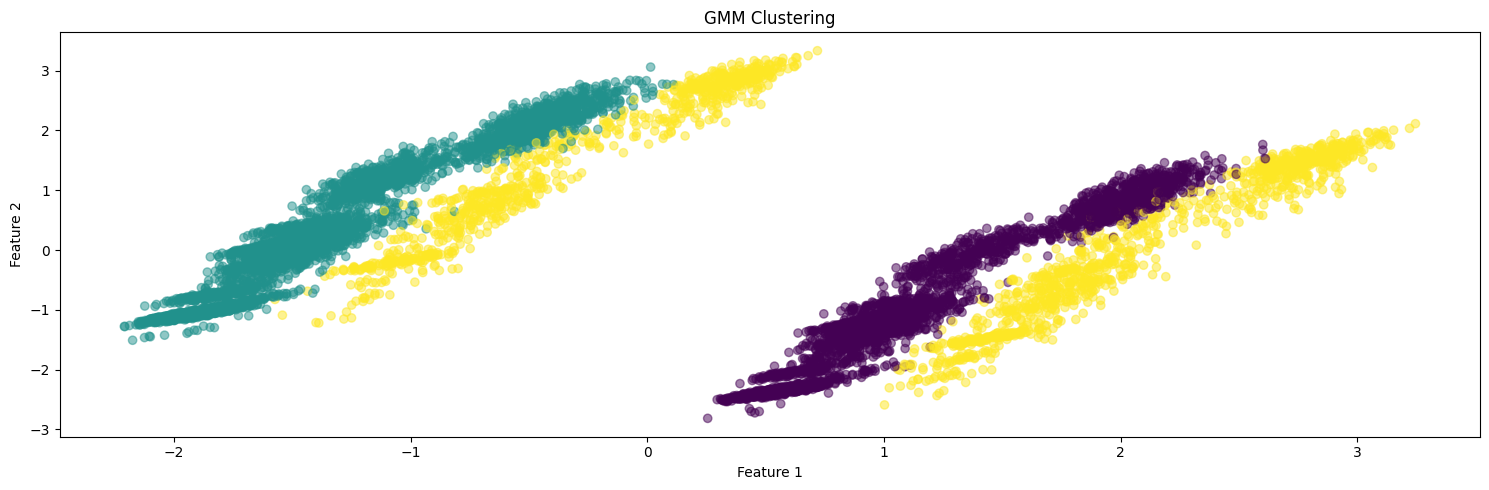

In [181]:

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42, n_init=10)
labels_gmm = gmm.fit_predict(finaldf)

plt.figure(figsize=(15, 5))

plt.subplot(1, 1, 1)
plt.scatter(finaldf[:, 0], finaldf[:, 1], c=labels_gmm, cmap='viridis', alpha=0.5)
plt.title('GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


##Evaluation Metrics

In [275]:

kmeans_elbow_silhouette = silhouette_score(finaldf, kmeans_elbow.labels_)
kmeans_elbow_db = davies_bouldin_score(finaldf, kmeans_elbow.labels_)
kmeans_elbow_ch = calinski_harabasz_score(finaldf, kmeans_elbow.labels_)

kmeans_silhouette_silhouette = silhouette_score(finaldf, kmeans_silhouette.labels_)
kmeans_silhouette_db = davies_bouldin_score(finaldf, kmeans_silhouette.labels_)
kmeans_silhouette_ch = calinski_harabasz_score(finaldf, kmeans_silhouette.labels_)


hierarchical_labels_complete = sch.fcluster(linked_complete, 6, criterion='maxclust')
hierarchical_silhouette_complete = silhouette_score(finaldf, hierarchical_labels_complete)
hierarchical_db_complete = davies_bouldin_score(finaldf, hierarchical_labels_complete)
hierarchical_ch_complete = calinski_harabasz_score(finaldf, hierarchical_labels_complete)

hierarchical_labels_single = sch.fcluster(linked_single, 6, criterion='maxclust')
hierarchical_silhouette_single = silhouette_score(finaldf, hierarchical_labels_single)
hierarchical_db_single = davies_bouldin_score(finaldf, hierarchical_labels_single)
hierarchical_ch_single = calinski_harabasz_score(finaldf, hierarchical_labels_single)

hierarchical_labels_average = sch.fcluster(linked_average, 6, criterion='maxclust')
hierarchical_silhouette_average = silhouette_score(finaldf, hierarchical_labels_average)
hierarchical_db_average = davies_bouldin_score(finaldf, hierarchical_labels_average)
hierarchical_ch_average = calinski_harabasz_score(finaldf, hierarchical_labels_average)

hierarchical_labels_ward = sch.fcluster(linked_ward, 6, criterion='maxclust')
hierarchical_silhouette_ward = silhouette_score(finaldf, hierarchical_labels_ward)
hierarchical_db_ward = davies_bouldin_score(finaldf, hierarchical_labels_ward)
hierarchical_ch_ward = calinski_harabasz_score(finaldf, hierarchical_labels_ward)


dbscan_euclidean_silhouette = silhouette_score(finaldf, labels_euclidean_dbscan)
dbscan_euclidean_db = davies_bouldin_score(finaldf, labels_euclidean_dbscan)
dbscan_euclidean_ch = calinski_harabasz_score(finaldf, labels_euclidean_dbscan)

dbscan_manhattan_silhouette = silhouette_score(finaldf, labels_manhattan_dbscan)
dbscan_manhattan_db = davies_bouldin_score(finaldf, labels_manhattan_dbscan)
dbscan_manhattan_ch = calinski_harabasz_score(finaldf, labels_manhattan_dbscan)


gmm_silhouette = silhouette_score(finaldf, labels_gmm)
gmm_db = davies_bouldin_score(finaldf, labels_gmm)
gmm_ch = calinski_harabasz_score(finaldf, labels_gmm)



from tabulate import tabulate

results = pd.DataFrame({
    'Method': ['K-means (Elbow)', 'K-means (Silhouette)', 'Hierarchical (Complete)', 'Hierarchical (Single)', 'Hierarchical (Average)', 'Hierarchical (Ward)',
                'DBSCAN (Euclidean)', 'DBSCAN (Manhattan)', 'GMM'],
    'Silhouette Score': [kmeans_elbow_silhouette, kmeans_silhouette_silhouette, hierarchical_silhouette_complete,
                         hierarchical_silhouette_single, hierarchical_silhouette_average, hierarchical_silhouette_ward, dbscan_euclidean_silhouette,
                         dbscan_manhattan_silhouette,  gmm_silhouette],
    'Davies-Bouldin Score': [kmeans_elbow_db, kmeans_silhouette_db, hierarchical_db_complete, hierarchical_db_single,
                              hierarchical_db_average, hierarchical_db_ward, dbscan_euclidean_db, dbscan_manhattan_db ,
                              gmm_db],
    'Calinski-Harabasz Score': [kmeans_elbow_ch, kmeans_silhouette_ch, hierarchical_ch_complete, hierarchical_ch_single,
                                 hierarchical_ch_average, hierarchical_ch_ward, dbscan_euclidean_ch, dbscan_manhattan_ch,
                                 gmm_ch]
})

print(tabulate(results, headers='keys', tablefmt='grid'))

+----+-------------------------+--------------------+------------------------+---------------------------+
|    | Method                  |   Silhouette Score |   Davies-Bouldin Score |   Calinski-Harabasz Score |
+====+=========================+====================+========================+===========================+
|  0 | K-means (Elbow)         |          0.162748  |                1.92485 |                 1494.55   |
+----+-------------------------+--------------------+------------------------+---------------------------+
|  1 | K-means (Silhouette)    |          0.192523  |                1.98018 |                 1248.16   |
+----+-------------------------+--------------------+------------------------+---------------------------+
|  2 | Hierarchical (Complete) |          0.101247  |                2.35751 |                  584.052  |
+----+-------------------------+--------------------+------------------------+---------------------------+
|  3 | Hierarchical (Single)   |     

In [211]:
dflabel.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male,Cluster
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False,3
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False,3


##K-means (Silhouette) clusters

In [53]:
dflabel = dfsupernew.copy()
dflabel['Cluster'] = kmeans_silhouette.labels_

df_m = pd.DataFrame({'features': list(dflabel)})
df_m['1 mean'] = list(dflabel.loc[dflabel['Cluster'] == 0].mean())
df_m['1 median'] = list(dflabel.loc[dflabel['Cluster'] == 0].median())
df_m['2 mean'] = list(dflabel.loc[dflabel['Cluster'] == 1].mean())
df_m['2 median'] = list(dflabel.loc[dflabel['Cluster'] == 1].median())
df_m['3 mean'] = list(dflabel.loc[dflabel['Cluster'] == 2].mean())
df_m['3 median'] = list(dflabel.loc[dflabel['Cluster'] == 2].median())
df_m['4 mean'] = list(dflabel.loc[dflabel['Cluster'] == 3].mean())
df_m['4 median'] = list(dflabel.loc[dflabel['Cluster'] == 3].median())
df_m['5 mean'] = list(dflabel.loc[dflabel['Cluster'] == 4].mean())
df_m['5 median'] = list(dflabel.loc[dflabel['Cluster'] == 4].median())
df_m['6 mean'] = list(dflabel.loc[dflabel['Cluster'] == 5].mean())
df_m['6 median'] = list(dflabel.loc[dflabel['Cluster'] == 5].median())


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.colheader_justify', 'right')
pd.set_option('display.precision', 3)
pd.options.display.float_format = '{:.3f}'.format

print(df_m)


            features     1 mean   1 median     2 mean  2 median     3 mean   3 median     4 mean   4 median    5 mean  5 median    6 mean  6 median
0       credit_score    651.770    653.000    650.065   653.000    653.094    651.000    649.967    650.500   650.992   650.000   649.186   652.000
1                age     39.199     38.000     38.296    37.000     40.154     39.000     39.425     38.000    38.649    37.000    38.774    37.000
2             tenure      5.000      5.000      5.049     5.000      4.966      5.000      5.050      5.000     5.058     5.000     4.950     5.000
3            balance  59862.093      0.000  63546.285 69413.440 119145.966 118907.600 120259.668 120120.490 63352.834 69857.005 60322.670 47536.400
4    products_number      1.573      2.000      1.517     1.000      1.511      1.000      1.527      1.000     1.513     1.000     1.548     2.000
5        credit_card      0.708      1.000      0.714     1.000      0.707      1.000      0.720      1.000     

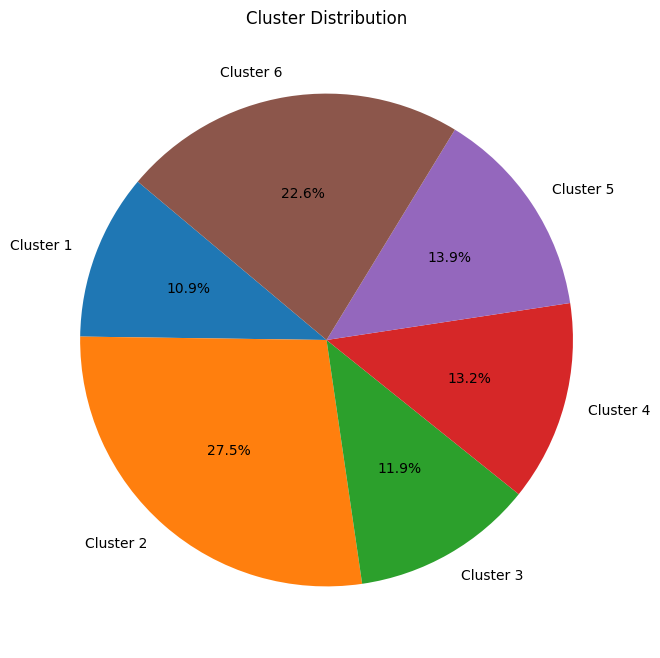

In [54]:
import matplotlib.pyplot as plt


cluster_counts = dflabel['Cluster'].value_counts().sort_index()


plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=[f'Cluster {i+1}' for i in range(len(cluster_counts))], autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.show()


##RFM

In [42]:
df = dfsupernew.copy()
df = df.drop_duplicates()

rfmtable = pd.DataFrame()
import pandas as pd


rfmtable['R'] = df['tenure']
rfmtable['F'] = df['products_number']
rfmtable['M'] = df['balance']


rfmtable["R_score"] = pd.qcut(rfmtable['R'], 4, labels=[ 4, 3, 2, 1])
rfmtable["F_score"] = pd.qcut(rfmtable['F'].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfmtable["M_score"] = pd.qcut(rfmtable['M'], 4, labels=[1, 2, 3], duplicates='drop')


rfmtable['score'] = rfmtable['R_score'].astype(int) + rfmtable['F_score'].astype(int) + rfmtable['M_score'].astype(int)

def rfm_scores(score):
    if score > 7:
        return '1'
    elif score > 5:
        return '2'
    else:
        return '3'


rfmtable['Cluster'] = rfmtable['score'].apply(lambda score : rfm_scores(score))


rfmtable.head()

,R,F,M,R_score,F_score,M_score,score,Cluster
0,2,1,0.00,4,1,1,6,2
1,1,1,83807.86,4,1,1,6,2
2,8,3,159660.80,1,4,3,8,1
3,1,2,0.00,4,3,1,8,1
4,2,1,125510.82,4,1,2,7,2


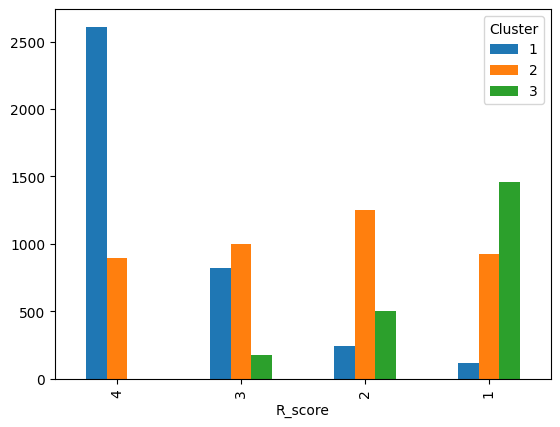

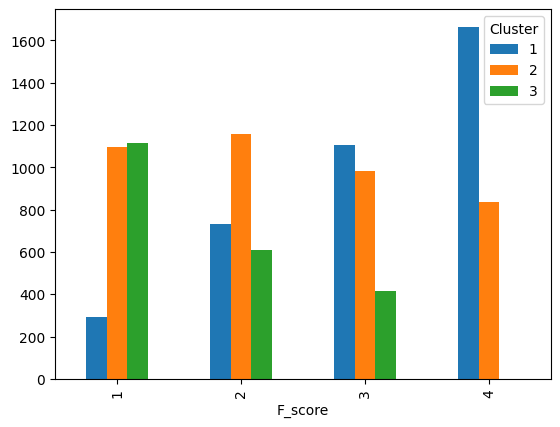

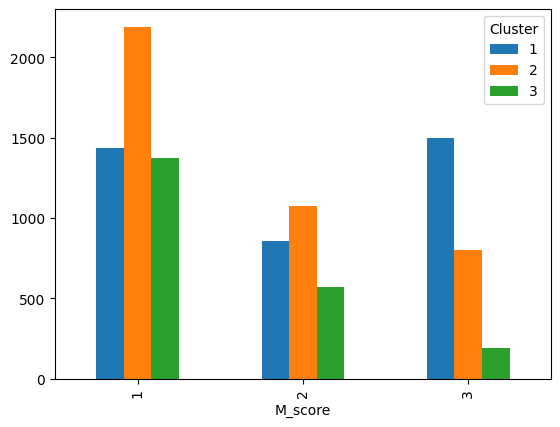

In [43]:
crosstb1=pd.crosstab(rfmtable['R_score'], rfmtable['Cluster'])
barplot1 = crosstb1.plot.bar()
crosstb2=pd.crosstab(rfmtable['F_score'], rfmtable['Cluster'])
barplot2 = crosstb2.plot.bar()
crosstb3=pd.crosstab(rfmtable['M_score'], rfmtable['Cluster'])
barplot3 = crosstb3.plot.bar()

In [44]:
from collections import Counter
c = Counter(list(rfmtable['Cluster']))
c

Counter({'2': 4068, '1': 3795, '3': 2137})

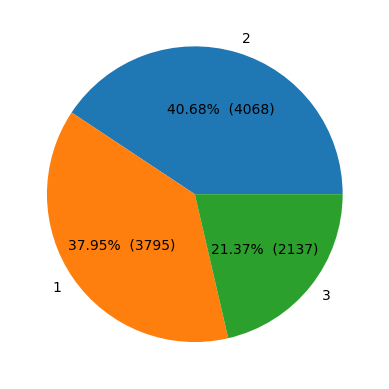

In [45]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

pr1 = list(c.values())
pr2 = list(c.keys())
plt.pie(pr1, labels=pr2, autopct=make_autopct(pr1))
plt.show()

In [49]:
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male,Cluster
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False,2
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False,2
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False,1
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False,1
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False,2


In [56]:
dfm = dfsupernew.copy()
dfm['Cluster'] = rfmtable['Cluster']
df = pd.DataFrame({'features': list(dfm)})
df['1 mean'] = list(dfm.loc[dfm['Cluster'] == '1'].mean())
df['1 median'] = list(dfm.loc[dfm['Cluster'] == '1'].median())
df['2 mean'] = list(dfm.loc[dfm['Cluster'] == '2'].mean())
df['2 median'] = list(dfm.loc[dfm['Cluster'] == '2'].median())
df['3 mean'] = list(dfm.loc[dfm['Cluster'] == '3'].mean())
df['3 median'] = list(dfm.loc[dfm['Cluster'] == '3'].median())

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)
pd.set_option('display.colheader_justify', 'right')
pd.set_option('display.precision', 3)
pd.options.display.float_format = '{:.3f}'.format

print(df)

            features    1 mean   1 median     2 mean   2 median    3 mean  3 median
0       credit_score   651.700    652.000    649.047    650.000   651.270   654.000
1                age    38.715     37.000     38.838     37.000    39.448    38.000
2             tenure     2.890      3.000      5.486      6.000     7.882     8.000
3            balance 89663.453 114321.280  71096.935  90429.035 63342.891 79656.810
4    products_number     1.794      2.000      1.463      1.000     1.191     1.000
5        credit_card     0.699      1.000      0.705      1.000     0.720     1.000
6      active_member     0.526      1.000      0.515      1.000     0.496     0.000
7   estimated_salary 99496.003  98896.060 101184.447 101670.465 99062.581 99449.860
8              churn     0.189      0.000      0.198      0.000     0.240     0.000
9     country_France     0.465      0.000      0.524      1.000     0.524     1.000
10   country_Germany     0.305      0.000      0.229      0.000     0.197   

In [24]:
dfw = dfsupernew.copy()

#Models

In [25]:
from sklearn.model_selection import train_test_split

In [227]:
churn_counts = dfw['churn'].value_counts()
print("Churn Value Counts:")
print(churn_counts)

Churn Value Counts:
churn
0    7963
1    2037
Name: count, dtype: int64


In [26]:
dfw['country_France'] = dfw['country_France'].astype('int64')
dfw['country_Germany'] = dfw['country_Germany'].astype('int64')
dfw['country_Spain'] = dfw['country_Spain'].astype('int64')
dfw['gender_Female'] = dfw['gender_Female'].astype('int64')
dfw['gender_Male'] = dfw['gender_Male'].astype('int64')
dfw.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
#dfw =dfw.drop(columns = 'customer_id')
# dfw.head()

In [230]:
dfw.dtypes

credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_France        int64
country_Germany       int64
country_Spain         int64
gender_Female         int64
gender_Male           int64
dtype: object

*Feature* Importance using best model

In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier


X = dfw.drop("churn", axis=1)
y = dfw["churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {

    "XGBoost": XGBClassifier()
}


param_grids = {

    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},

}

best_params = {}
for name, model in models.items():
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_params[name] = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}")


best_models = {}
for name, model in models.items():
        best_model = model.set_params(**best_params[name])
        best_model.fit(X_train_scaled, y_train)
        best_models[name] = best_model


results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}


results_df = pd.DataFrame(results).T


print("\nResults on Test Set:")
print(results_df)
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, X_test, y_test, n_repeats=15)
pd.DataFrame(
    {
        k: result[k]
        for k in (
            "importances_mean",
            "importances_std",
        )
    },
    index=X_test.columns,
).sort_values(by="importances_mean", ascending=False)

Best parameters for XGBoost: {'max_depth': 3, 'n_estimators': 50}

Results on Test Set:
         accuracy    f1  precision  recall  roc_auc
XGBoost     0.871 0.607      0.752   0.509    0.734


,importances_mean,importances_std
products_number,0.018,0.002
active_member,0.006,0.002
balance,0.004,0.001
credit_card,0.001,0.001
credit_score,0.000,0.000
age,0.000,0.000
estimated_salary,0.000,0.000
country_France,0.000,0.000
country_Germany,0.000,0.000
country_Spain,0.000,0.000


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier


X = dfw.drop("churn", axis=1)
y = dfw["churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}


param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10]},
    "Decision Tree": {'max_depth': [3, 5, 7]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    "Gradient Boosting": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    "Bagging": {'n_estimators': [50, 100, 200]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "K-Nearest Neighbors": {'n_neighbors': [3, 5, 7]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
    "CatBoost": {'iterations': [50, 100, 200], 'depth': [3, 5, 7]}
}


best_params = {}
for name, model in models.items():
        grid_search = GridSearchCV(model, param_grids.get(name, {}), cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_params[name] = grid_search.best_params_
        print(f"Best parameters for {name}: {grid_search.best_params_}")

best_models = {}
for name, model in models.items():
        best_model = model.set_params(**best_params[name])
        best_model.fit(X_train_scaled, y_train)
        best_models[name] = best_model


results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}


results_df = pd.DataFrame(results).T


print("\nResults on Test Set:")
print(results_df)

Best parameters for Logistic Regression: {'C': 10}
Best parameters for Decision Tree: {'max_depth': 5}
Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 200}
Best parameters for Gradient Boosting: {'max_depth': 3, 'n_estimators': 100}
Best parameters for Bagging: {'n_estimators': 200}
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7}
Best parameters for XGBoost: {'max_depth': 3, 'n_estimators': 50}
Best parameters for CatBoost: {'depth': 7, 'iterations': 200}

Results on Test Set:
                     accuracy  precision    recall        f1   roc_auc
Logistic Regression    0.8110   0.552448  0.201018  0.294776  0.580596
Decision Tree          0.8580   0.768473  0.396947  0.523490  0.683850
Random Forest          0.8575   0.784211  0.379135  0.511149  0.676811
Gradient Boosting      0.8645   0.742063  0.475827  0.579845  0.717689
Bagging                0.8625   0.706294  0.513995  0.594993  0.730862
SVM     

In [30]:

X = dfw.drop("churn", axis=1)
y = dfw["churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}


mlp = MLPClassifier(max_iter=100)


grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_model = grid_search.best_estimator_


print("Best Model Summary:")
print(best_model)


accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Model Summary:
MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50,),
              learning_rate='adaptive', max_iter=100)
Test Accuracy: 0.862


In [233]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test))


loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/20
125/125 [==============================] - 4s 17ms/step - loss: 0.4988 - accuracy: 0.7901 - val_loss: 0.4357 - val_accuracy: 0.8185
Epoch 2/20
125/125 [==============================] - 2s 16ms/step - loss: 0.4538 - accuracy: 0.8090 - val_loss: 0.4016 - val_accuracy: 0.8260
Epoch 3/20
125/125 [==============================] - 2s 17ms/step - loss: 0.4340 - accuracy: 0.8165 - val_loss: 0.3968 - val_accuracy: 0.8435
Epoch 4/20
125/125 [==============================] - 2s 14ms/step - loss: 0.4110 - accuracy: 0.8251 - val_loss: 0.3815 - val_accuracy: 0.8550
Epoch 5/20
125/125 [==============================] - 1s 11ms/step - loss: 0.3989 - accuracy: 0.8361 - val_loss: 0.3562 - val_accuracy: 0.8575
Epoch 6/20
125/125 [==============================] - 1s 7ms/step - loss: 0.3850 - accuracy: 0.8379 - val_loss: 0.3586 - val_accuracy: 0.8580
Epoch 7/20
125/125 [==============================] - 1s 6ms/step - loss: 0.3762 - accuracy: 0.8450 - val_loss: 0.3510 - val_accuracy: 0.8615
E

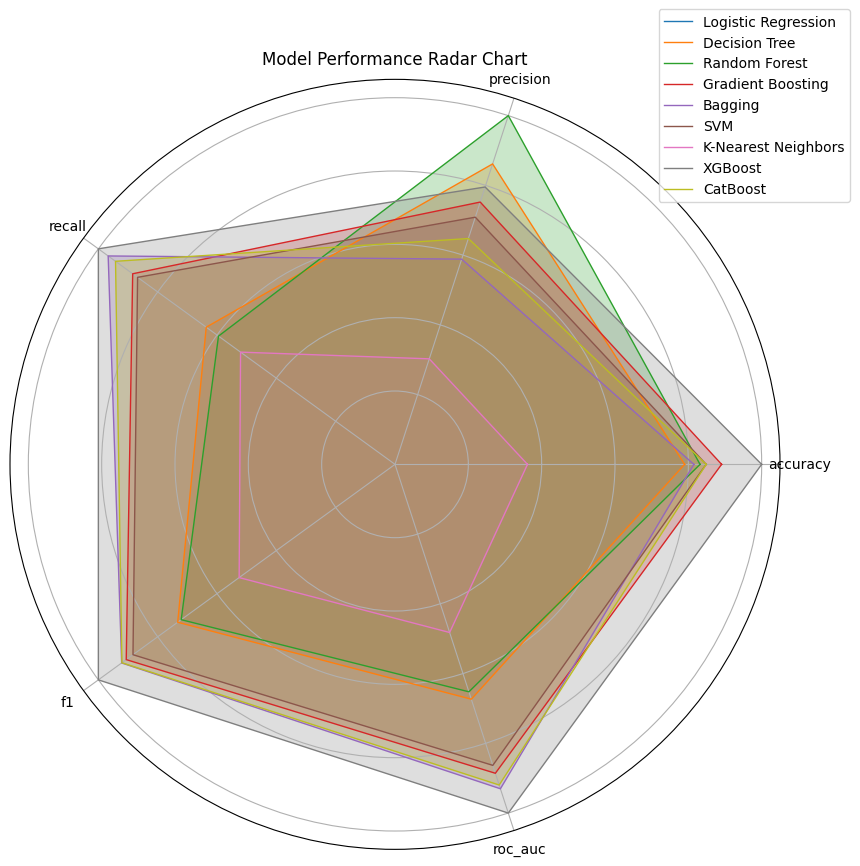

In [234]:

models = results_df.index
metrics = results_df.columns


normalized_data = (results_df - results_df.min()) / (results_df.max() - results_df.min())


data_array = normalized_data.values


angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()


angles += angles[:1]


plt.figure(figsize=(10, 10))
for i in range(len(models)):
    values = data_array[i]
    values = np.concatenate((values, [values[0]]))
    ax = plt.subplot(111, polar=True)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=models[i])
    ax.fill(angles, values, alpha=0.25)
    ax.set_yticklabels([])
plt.xticks(angles[:-1], metrics)
plt.title('Model Performance Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


In [31]:

base_models = [
    ('decision_tree', DecisionTreeClassifier(**best_params["Decision Tree"])),
    ('random_forest', RandomForestClassifier(**best_params["Random Forest"])),
    ('gradient_boosting', GradientBoostingClassifier(**best_params["Gradient Boosting"])),
    #('bagging', BaggingClassifier(**best_params["Bagging"])),
    ('svm', SVC(**best_params["SVM"], probability=True)),
    ('xgboost', XGBClassifier(**best_params["XGBoost"])),
    ('catboost', CatBoostClassifier(verbose=0, **best_params["CatBoost"]))
]


stacked_lr = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())


stacked_nn = StackingClassifier(estimators=base_models, final_estimator=MLPClassifier())


bagging_meta = BaggingClassifier(base_estimator=VotingClassifier(estimators=base_models, voting='soft'))


adaboost_meta = AdaBoostClassifier(base_estimator=VotingClassifier(estimators=base_models, voting='soft'))


voting_soft = VotingClassifier(estimators=base_models, voting='soft')
voting_hard = VotingClassifier(estimators=base_models, voting='hard')


models = {
    'Stacked LR': stacked_lr,
    'Stacked NN': stacked_nn,
    'Bagging Meta': bagging_meta,
    'AdaBoost Meta': adaboost_meta,
    'Voting Soft': voting_soft,
    'Voting Hard': voting_hard
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Mean Cross-Validation Accuracy for {name}: {cv_scores.mean()}")

Mean Cross-Validation Accuracy for Stacked LR: 0.8651250000000001
Mean Cross-Validation Accuracy for Stacked NN: 0.864625
Mean Cross-Validation Accuracy for Bagging Meta: 0.8633749999999999
Mean Cross-Validation Accuracy for AdaBoost Meta: 0.8508749999999999
Mean Cross-Validation Accuracy for Voting Soft: 0.8636250000000001
Mean Cross-Validation Accuracy for Voting Hard: 0.8634999999999999


In [236]:

base_models = [
    ('decision_tree', DecisionTreeClassifier(**best_params["Decision Tree"])),
    ('random_forest', RandomForestClassifier(**best_params["Random Forest"])),
    ('gradient_boosting', GradientBoostingClassifier(**best_params["Gradient Boosting"])),
    ('bagging', BaggingClassifier(**best_params["Bagging"])),
    ('svm', SVC(**best_params["SVM"], probability=True)),
    ('xgboost', XGBClassifier(**best_params["XGBoost"])),
    ('catboost', CatBoostClassifier(verbose=0, **best_params["CatBoost"]))
]


base_models_predictions_train = {}
for index, (name, model) in enumerate(base_models):
    model.fit(X_train_scaled, y_train)
    base_models_predictions_train[name] = model.predict_proba(X_train_scaled)[:, 1]


X_meta_train = np.column_stack([preds for preds in base_models_predictions_train.values()])


scaler_meta = StandardScaler()
X_meta_train_scaled = scaler_meta.fit_transform(X_meta_train)


meta_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_meta_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


meta_model.fit(X_meta_train_scaled, y_train, epochs=20, batch_size=128, validation_split=0.2)


base_models_predictions_test = {}
for name, model in base_models:
    base_models_predictions_test[name] = model.predict_proba(X_test_scaled)[:, 1]
X_meta_test = np.column_stack([preds for preds in base_models_predictions_test.values()])
X_meta_test_scaled = scaler_meta.transform(X_meta_test)


test_loss, test_accuracy = meta_model.evaluate(X_meta_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/20
50/50 [==============================] - 2s 19ms/step - loss: 0.1762 - accuracy: 0.9413 - val_loss: 0.0108 - val_accuracy: 0.9975
Epoch 2/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0080 - accuracy: 0.9987 - val_loss: 0.0012 - val_accuracy: 0.9994
Epoch 3/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 3.5301e-04 - val_accuracy: 1.0000
Epoch 4/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 1.1958e-04 - val_accuracy: 1.0000
Epoch 5/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.1839e-04 - val_accuracy: 1.0000
Epoch 6/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 5.7210e-05 - val_accuracy: 1.0000
Epoch 7/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.9989 - val_loss: 3.2097e-05 - val_accuracy: 1.00

In [237]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import numpy as np


X = dfw.drop("churn", axis=1)
y = dfw["churn"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


base_models = [
    ('decision_tree', DecisionTreeClassifier(**best_params["Decision Tree"])),
    ('random_forest', RandomForestClassifier(**best_params["Random Forest"])),
    ('gradient_boosting', GradientBoostingClassifier(**best_params["Gradient Boosting"])),
    ('bagging', BaggingClassifier(**best_params["Bagging"])),
    ('svm', SVC(**best_params["SVM"], probability=True)),
    #('xgboost', XGBClassifier(**best_params["XGBoost"])),
    ('catboost', CatBoostClassifier(verbose=0, **best_params["CatBoost"]))
]


base_models_predictions_train = {}
for index, (name, model) in enumerate(base_models):
    model.fit(X_train_scaled, y_train)
    base_models_predictions_train[name] = model.predict_proba(X_train_scaled)[:, 1]


X_meta_train = np.column_stack([preds for preds in base_models_predictions_train.values()])


scaler_meta = StandardScaler()
X_meta_train_scaled = scaler_meta.fit_transform(X_meta_train)


xgboost_meta = XGBClassifier()
xgboost_meta.fit(X_meta_train_scaled, y_train)


base_models_predictions_test = {}
for name, model in base_models:
    base_models_predictions_test[name] = model.predict_proba(X_test_scaled)[:, 1]
X_meta_test = np.column_stack([preds for preds in base_models_predictions_test.values()])
X_meta_test_scaled = scaler_meta.transform(X_meta_test)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8615


In [ ]:
!pip install lifetimes

In [242]:
import pandas as pd
from lifetimes import ParetoNBDFitter, BetaGeoFitter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


df = dfw.copy()


scaler = StandardScaler()
df['recency'] = df['tenure']
df['frequency'] = df['products_number']
df['Monetary'] = df['balance']
df['T'] = df['age']


X = df.drop("churn", axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pareto_model = ParetoNBDFitter()
pareto_model.fit(X_train['frequency'], X_train['recency'], X_train['T'])


beta_geo_model = BetaGeoFitter(penalizer_coef=0.1)
beta_geo_model.fit(X_train['frequency'], X_train['recency'], X_train['T'])


churn_probability_pareto = pareto_model.conditional_probability_alive(X_test['frequency'], X_test['recency'], X_test['T'])
churn_prediction_pareto = churn_probability_pareto < 0.5


churn_probability_beta_geo = beta_geo_model.conditional_probability_alive(X_test['frequency'], X_test['recency'], X_test['T'])
churn_prediction_beta_geo = churn_probability_beta_geo < 0.5


expected_purchases_pareto = pareto_model.conditional_expected_number_of_purchases_up_to_time(
    12,
    X_test['frequency'],
    X_test['recency'],
    X_test['T']
)


clv_pareto = expected_purchases_pareto * X_test['Monetary']


expected_purchases_beta_geo = beta_geo_model.conditional_expected_number_of_purchases_up_to_time(
    12,
    X_test['frequency'],
    X_test['recency'],
    X_test['T']
)


clv_beta_geo = expected_purchases_beta_geo * X_test['Monetary']


print("CLV using Pareto/NBD model:")
print(clv_pareto.head())


print("\nCLV using BetaGeoFitter model:")
print(clv_beta_geo.head())


pareto_accuracy = accuracy_score(y_test, churn_prediction_pareto)
beta_geo_accuracy = accuracy_score(y_test, churn_prediction_beta_geo)

pareto_precision = precision_score(y_test, churn_prediction_pareto)
beta_geo_precision = precision_score(y_test, churn_prediction_beta_geo)

pareto_recall = recall_score(y_test, churn_prediction_pareto)
beta_geo_recall = recall_score(y_test, churn_prediction_beta_geo)

pareto_f1 = f1_score(y_test, churn_prediction_pareto)
beta_geo_f1 = f1_score(y_test, churn_prediction_beta_geo)

pareto_roc_auc = roc_auc_score(y_test, churn_probability_pareto)
beta_geo_roc_auc = roc_auc_score(y_test, churn_probability_beta_geo)


print("\nPareto/NBD Model Evaluation:")
print("Accuracy:", pareto_accuracy)
print("Precision:", pareto_precision)
print("Recall:", pareto_recall)
print("F1-score:", pareto_f1)
print("ROC AUC Score:", pareto_roc_auc)

print("\nBetaGeoFitter Model Evaluation:")
print("Accuracy:", beta_geo_accuracy)
print("Precision:", beta_geo_precision)
print("Recall:", beta_geo_recall)
print("F1-score:", beta_geo_f1)
print("ROC AUC Score:", beta_geo_roc_auc)


CLV using Pareto/NBD model:
6252    40.947
4684     0.000
1731     0.000
4742     0.070
4521   828.719
dtype: float64

CLV using BetaGeoFitter model:
6252    589.867
4684      0.000
1731      0.000
4742    528.717
4521   4645.144
dtype: float64

Pareto/NBD Model Evaluation:
Accuracy: 0.1965
Precision: 0.1965
Recall: 1.0
F1-score: 0.32845800250731305
ROC AUC Score: 0.27197724332635054

BetaGeoFitter Model Evaluation:
Accuracy: 0.1965
Precision: 0.1965
Recall: 1.0
F1-score: 0.32845800250731305
ROC AUC Score: 0.3950298550710869


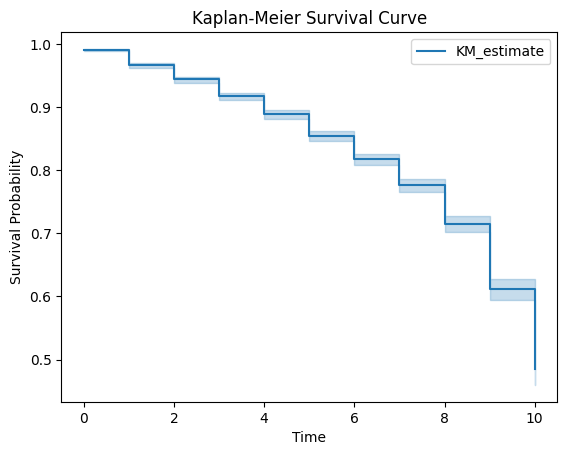

Median Survival Time: 10.0


In [244]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter


df = dfw.copy()


time_column = 'tenure'
event_column = 'churn'


kmf = KaplanMeierFitter()
kmf.fit(df[time_column], event_observed=df[event_column])


kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()


median_survival_time = kmf.median_survival_time_
print("Median Survival Time:", median_survival_time)

In [245]:
from lifelines.utils import median_survival_times
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

10.0
       KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.500                  10.000                     inf


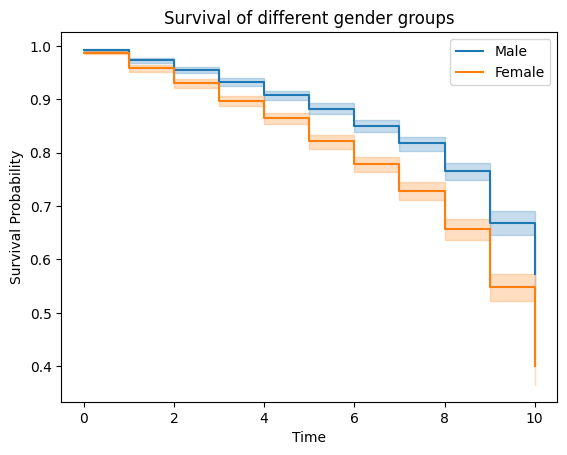

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter


df = dfw.copy()


time_column = 'tenure'
event_column = 'churn'


kmf = KaplanMeierFitter()


male_data = df[df['gender_Male'] == 1]
kmf.fit(durations=male_data[time_column], event_observed=male_data[event_column], label="Male")
ax = kmf.plot_survival_function()


female_data = df[df['gender_Female'] == 1]
kmf.fit(durations=female_data[time_column], event_observed=female_data[event_column], label="Female")
kmf.plot_survival_function(ax=ax)

plt.title("Survival of different gender groups")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()


In [248]:

from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored


survival_data = list(zip(dfw['churn'].astype(bool), dfw['tenure']))


y = np.array(survival_data, dtype=[('event', bool), ('time', float)])


X = dfw.drop(['tenure', 'churn'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(X_train, y_train)


c_index = concordance_index_censored(y_test['event'], y_test['time'], rsf.predict(X_test))
print("Concordance Index:", c_index)


Concordance Index: (0.8040881023918238, 339880, 82810, 0, 60303)


Concordance Index (C-index): The first value, 0.8040881023918238, represents the concordance index itself. The C-index is a measure of the predictive accuracy of a survival model. It ranges from 0 to 1, where 0.5 indicates random prediction (no better than chance) and 1 indicates perfect prediction. In your case, the C-index is approximately 0.804, which suggests that your model has fairly good predictive accuracy.
Number of Concordant Pairs: The second value, 339880, represents the number of concordant pairs in the evaluation. A concordant pair is a pair of samples in which the sample with the higher survival time also has the higher predicted risk according to the model. This number is used in the calculation of the C-index.
Number of Discordant Pairs: The third value, 82810, represents the number of discordant pairs in the evaluation. A discordant pair is a pair of samples in which the sample with the higher survival time has the lower predicted risk according to the model. This number is used in the calculation of the C-index.
Number of Tied Pairs: The fourth value, 0, represents the number of tied pairs in the evaluation. A tied pair is a pair of samples with the same survival time. This number is used in the calculation of the C-index.
Number of Tied and Discordant Pairs: The fifth value, 60303, represents the number of tied and discordant pairs in the evaluation. This number is used in the calculation of the C-index.
Overall, a higher C-index indicates better predictive accuracy, and the other values provide additional information about the performance of the model. In your case, the C-index of approximately 0.804 suggests that your survival random forest model is performing reasonably well.